In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


### Verificando os tipos de dados existentes no dataset

In [4]:
df.dtypes

RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

### Verificando a existência de valores nulos

In [5]:
df.info() #conhecendo nosso dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [6]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


### Analise da variável pontuação crédito]

In [7]:
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [8]:
df['pontuacao_credito'].describe()

count    7000.000000
mean      649.787000
std        97.046279
min       350.000000
25%       582.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: pontuacao_credito, dtype: float64

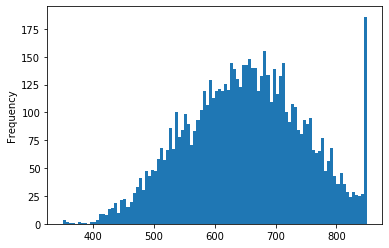

In [9]:
df.pontuacao_credito.plot(kind = 'hist', bins = 100)

In [10]:
df.pontuacao_credito.mean()

649.787

In [11]:
submit = pd.DataFrame(index=['estado_residencia'],
                      columns=['moda', 'mediana', 'media', 'desvio_padrao'])

In [12]:
submit

,moda,mediana,media,desvio_padrao
estado_residencia,NaN,NaN,NaN,NaN


In [13]:
submit = df.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode,'median','mean','std'])                 

In [14]:
submit.rename(columns={'mode': 'moda', 'median': 'mediana','mean':'media','std':'desvio_padrao'}, inplace=True)                              

In [15]:
submit

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


In [16]:
answer = submit.to_json('submission.json', orient = 'index')